[WARN] Failed to load descriptor from ./mapping_schemes/mapping_scheme_400_adi.py: No module named 'adi._adi_cffi'
[WARN] Failed to load descriptor from ./mapping_schemes/mapping_scheme_378.py: No module named 'adi._adi_cffi'
[INFO] Loaded 28 descriptor(s) from ./mapping_schemes
Selected mapping: mapping_435
Score: 3
['raw 1', 'raw 2', 'raw 3', 'raw 4', 'raw 5', 'raw 6', 'raw 7', 'raw 8', 'raw 9', 'raw 10', 'raw 11', 'raw 12', 'raw 13', 'raw 14', 'raw 15', 'raw 16', 'raw 17', 'raw 18', 'raw 19', 'raw 20', 'raw 21', 'raw 22', 'raw 23', 'raw 24', 'raw 25', 'raw 26', 'raw 27', 'raw 28', 'raw 29', 'raw 30', 'raw 31', 'raw 32', 'raw 129', 'raw 130', 'raw 131', 'raw 132', 'raw 133', 'raw 134', 'raw 135', 'raw 136', 'raw 137', 'raw 138', 'raw 139', 'raw 140', 'raw 141', 'raw 142', 'raw 143', 'raw 144', 'raw 145', 'raw 146', 'raw 147', 'raw 148', 'raw 149', 'raw 150', 'raw 151', 'raw 152', 'raw 153', 'raw 154', 'raw 155', 'raw 156', 'raw 157', 'raw 158', 'raw 159', 'raw 160']


/tmp/ipykernel_39521/577625086.py:43: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/tmp/ipykernel_39521/577625086.py:43: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/home/david/Projects/sparc-codeathon-team-B/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


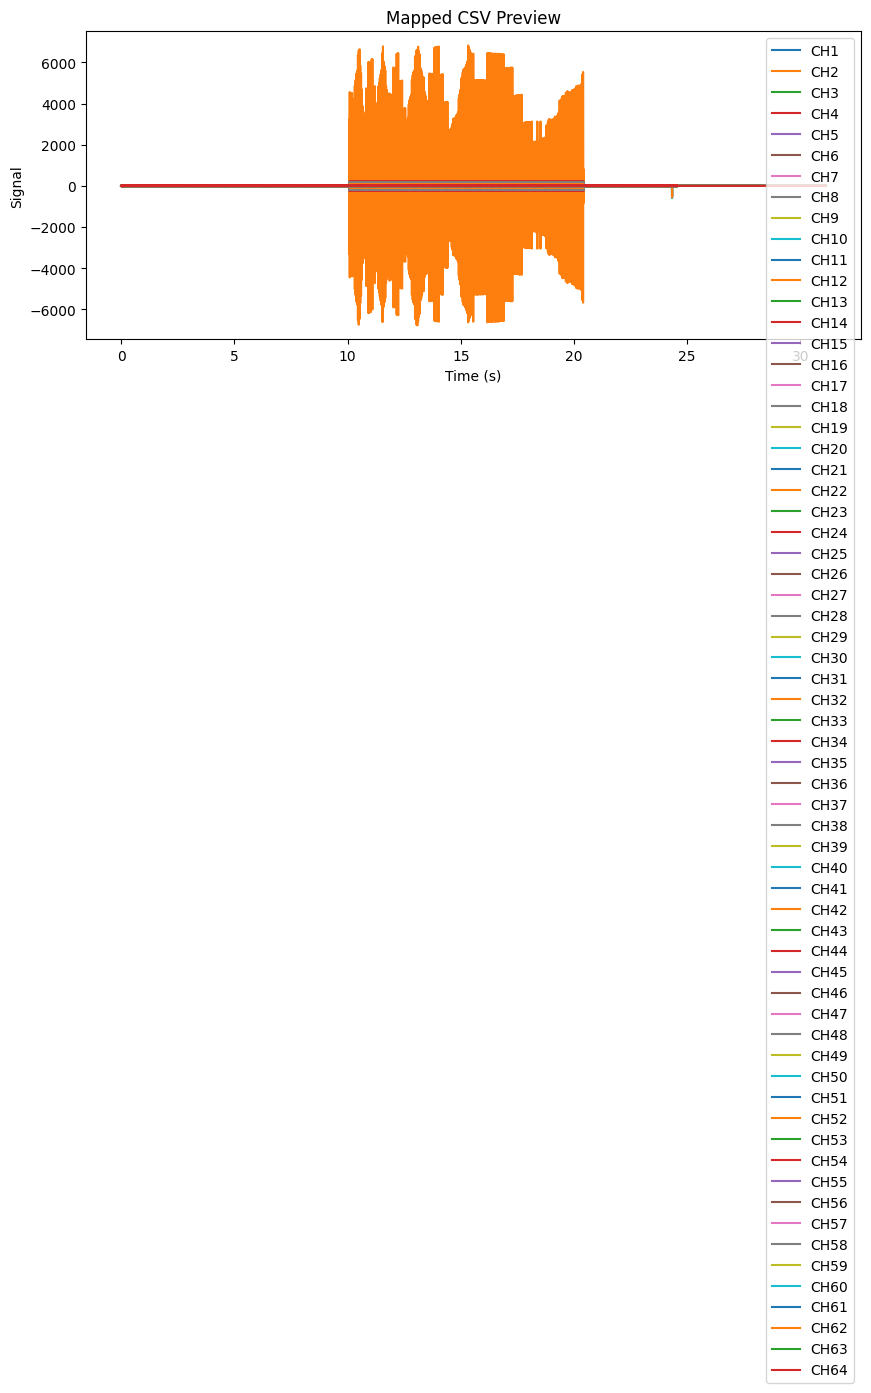

✅ Saved standardized data to: output/electrode1datafile0243.ns5


In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 3

import matplotlib.pyplot as plt
from pathlib import Path
from sparcfuse.utils import match_best_mapping, load_all_descriptors, save_standardized_output

# Load all descriptor files from folder
descriptors = load_all_descriptors()

# File to convert
filepath = "../downloads/435/electrode1datafile0243.ns5"
filename = Path(filepath).name

# Optional: specify SPARC ID for faster mapping
# Works also without sparc_id as the other csv mapping schemes works well on this CSV file
result = match_best_mapping(descriptors, filepath, sparc_id=435)

# Check if mapping was successful
if result["descriptor"] is None:
    raise RuntimeError("No suitable mapping descriptor found.")

# Show mapping result
print("Selected mapping:", result['descriptor']['id'])
print("Score:", result['score'])


# Preview signal
time = result['result']['time']
signals = result['result']['signals']


print(result['result']["channel_names"])

plt.figure(figsize=(10, 4))
for i, ch in enumerate(signals):
    plt.plot(time, ch, label=f"CH{i+1}")
plt.xlabel("Time (s)")
plt.ylabel("Signal")
plt.title("Mapped CSV Preview")
plt.legend()
plt.tight_layout()
plt.show()

# Save to standardized .npz format in ./output
output_dir = Path("../output")
output_dir.mkdir(parents=True, exist_ok=True)

output_path = output_dir / filename.replace(".csv", ".npz")

save_standardized_output(
    output_path=output_path,
    result_dict=result["result"],
    descriptor=result["descriptor"],
    original_filename=filename,
    annotations=result["result"].get("annotations", []),
    metadata_overrides=None,
    file_format="npz"
)

print(f"✅ Saved standardized data to: {output_path}")


/tmp/ipykernel_8716/1322574807.py:23: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/tmp/ipykernel_8716/1322574807.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


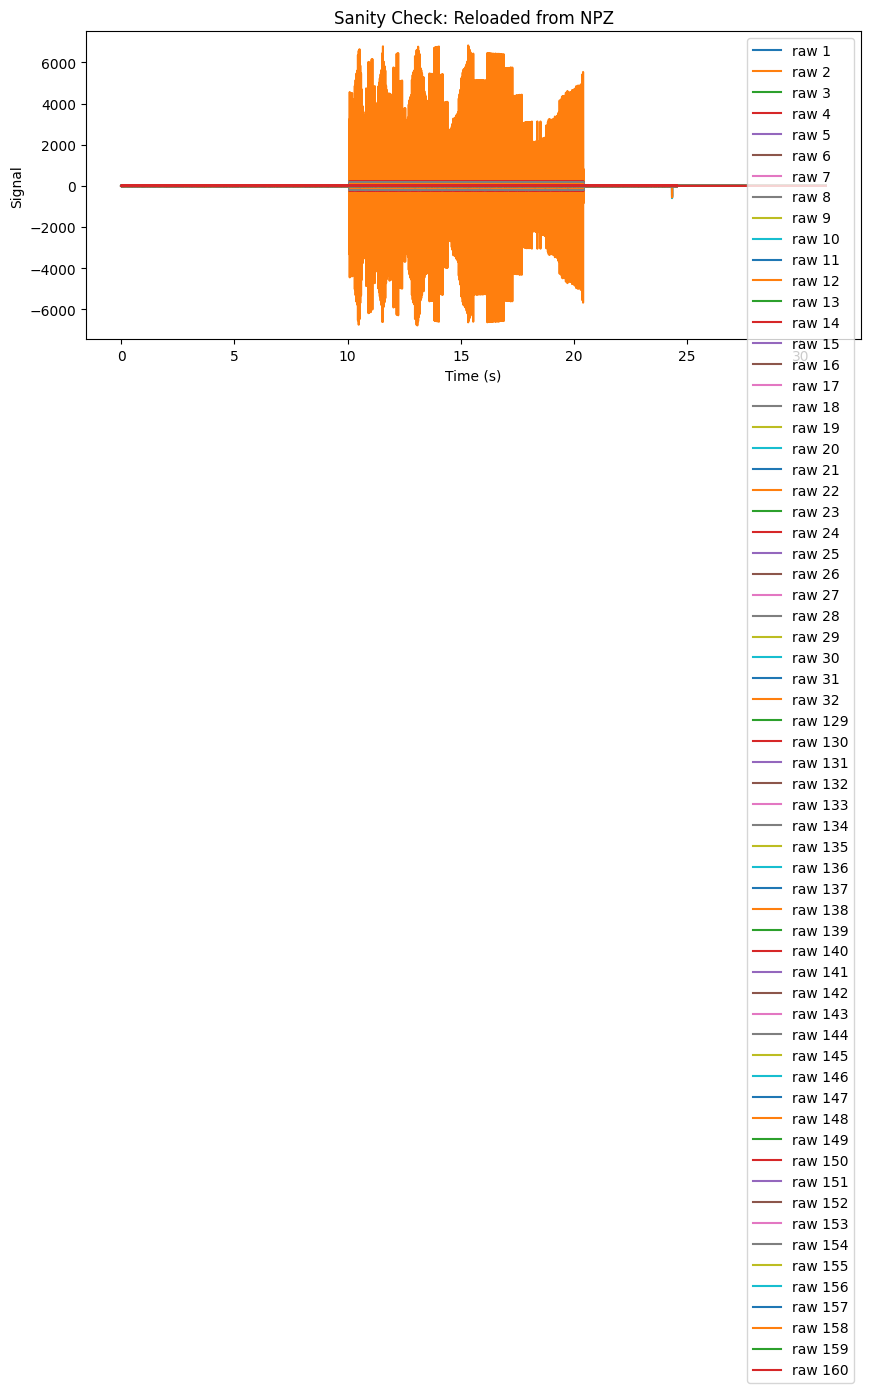

{'time_units': 'seconds', 'time_auto_generated': False, 'source_format': '.ns5', 'database_id': 'unknown', 'sampling_frequency': np.float64(30000.0), 'channel_names': ['raw 1', 'raw 2', 'raw 3', 'raw 4', 'raw 5', 'raw 6', 'raw 7', 'raw 8', 'raw 9', 'raw 10', 'raw 11', 'raw 12', 'raw 13', 'raw 14', 'raw 15', 'raw 16', 'raw 17', 'raw 18', 'raw 19', 'raw 20', 'raw 21', 'raw 22', 'raw 23', 'raw 24', 'raw 25', 'raw 26', 'raw 27', 'raw 28', 'raw 29', 'raw 30', 'raw 31', 'raw 32', 'raw 129', 'raw 130', 'raw 131', 'raw 132', 'raw 133', 'raw 134', 'raw 135', 'raw 136', 'raw 137', 'raw 138', 'raw 139', 'raw 140', 'raw 141', 'raw 142', 'raw 143', 'raw 144', 'raw 145', 'raw 146', 'raw 147', 'raw 148', 'raw 149', 'raw 150', 'raw 151', 'raw 152', 'raw 153', 'raw 154', 'raw 155', 'raw 156', 'raw 157', 'raw 158', 'raw 159', 'raw 160'], 'channel_units': ['unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknow

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Load the .npz file
npz_path = Path("../output/electrode1datafile0243.npz")
data = np.load(npz_path, allow_pickle=True)

# Extract arrays
time = data["time"]
signals = data["signals"]
metadata = data["metadata"].item()  # metadata is saved as a Python dict
channel_names = metadata.get("channel_names", [f"CH{i+1}" for i in range(len(signals))])

# Plot
plt.figure(figsize=(10, 4))
for i, ch in enumerate(signals):
    plt.plot(time, ch, label=channel_names[i])
plt.xlabel("Time (s)")
plt.ylabel("Signal")
plt.title("Sanity Check: Reloaded from NPZ")
plt.legend()
plt.tight_layout()
plt.show()

print(data['metadata'])

print("shape of time:", time.shape)
print("shape of signals:", signals.shape)

In [ ]:
# Deep inspection of a MATLAB *.mat file  ────────────────────────────────────────
# Put the file you want to explore in mat_path and run the cell.

mat_path =  "../downloads/PilotExpt26_220401_133140.mat"
# ───────────────────────────────────────────────────────────────────────────────

from pathlib import Path
import numpy as np
from scipy.io import loadmat            # for v5 / v7 (<7.3) files

try:                                    # optional: v7.3 reader
    import mat73                        # pip install mat73
except ImportError:
    mat73 = None

# ── helpers ────────────────────────────────────────────────────────────────────
def _load_any_mat(fp: str):
    """Load any MATLAB file (v5 – v7.3) and return a clean dict."""
    try:                                # classic MAT reader first
        d = loadmat(fp, squeeze_me=True, struct_as_record=False)
        return {k: v for k, v in d.items() if not k.startswith("__")}
    except NotImplementedError:         # v7.3 (HDF5) needs mat73
        if mat73 is None:
            raise RuntimeError(
                "MAT‑file looks like v7.3. Install mat73:  pip install mat73"
            )
        return mat73.loadmat(fp)

# ---------------------------------------------------------------------------
# recognise scipy.io.matlab.mio5_params.mat_struct as a struct as well
# ---------------------------------------------------------------------------
import types
from scipy.io.matlab.mio5_params import mat_struct   # import the class

def _is_struct(obj):
    """Return True for MATLAB structs loaded by either SciPy or mat73."""
    return isinstance(
        obj,
        (
            np.void,          # numpy record (SciPy when struct_as_record=True)
            mat_struct,       # the 'mat_struct' wrapper (default SciPy output)
            dict,             # mat73 returns dicts
        ),
    )

def _struct_fields(obj):
    """Yield (field_name, value) pairs from any recognised struct proxy."""
    if isinstance(obj, dict):                    # mat73
        yield from obj.items()
    elif isinstance(obj, np.void):               # numpy.void (rare)
        for name in obj.dtype.names:
            yield name, getattr(obj, name)
    elif isinstance(obj, mat_struct):            # the usual SciPy case
        for name in obj._fieldnames:
            yield name, getattr(obj, name)

def _summarize(val):
    """Return a concise one‑liner summary of a value."""
    if isinstance(val, np.ndarray):
        return f"ndarray {val.shape} dtype={val.dtype}"
    if np.isscalar(val):
        return f"{type(val).__name__} {val}"
    if isinstance(val, (list, tuple)):
        return f"{type(val).__name__} len={len(val)}"
    if _is_struct(val):
        return "struct"
    return type(val).__name__

def _rec_print(obj, name, indent=0, depth=0, max_depth=4):
    """Recursive pretty‑printer for nested MATLAB structures."""
    pad = "    " * indent
    print(f"{pad}• {name:<20} {_summarize(obj)}")
    if depth >= max_depth:
        return
    # Dive into structs
    if _is_struct(obj):
        for k, v in _struct_fields(obj):
            _rec_print(v, k, indent + 1, depth + 1, max_depth)
    # Dive into homogeneous list/tuple of structs or ndarrays
    elif isinstance(obj, (list, tuple)) and obj and all(_is_struct(x) for x in obj):
        for i, v in enumerate(obj[:5]):           # show at most first 5
            _rec_print(v, f"[{i}]", indent + 1, depth + 1, max_depth)

# ── run ────────────────────────────────────────────────────────────────────────
mat_path = Path(mat_path).expanduser()
if not mat_path.exists():
    raise FileNotFoundError(mat_path)

mat_dict = _load_any_mat(str(mat_path))

print(f"\n📂 Contents of {mat_path.name}")
print("=".ljust(80, "="))
for key, val in mat_dict.items():
    _rec_print(val, key)


/tmp/ipykernel_6151/4244919251.py:33: DeprecationWarning: Please import `mat_struct` from the `scipy.io.matlab` namespace; the `scipy.io.matlab.mio5_params` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.io.matlab.mio5_params import mat_struct   # import the class


ValueError: Unknown mat file type, version 45, 0